# **Import Libraries**

In [ ]:
import pandas as pd
from google.colab import drive
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **Load CSV Files**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/MyDrive/data-coding-challenge/'

customers_path = base_path + 'customers.csv'
invoices_path = base_path + 'invoices.csv'
positions_path = base_path + 'positions.csv'

In [ ]:
customers_df = pd.read_csv(customers_path, delimiter=';')
invoices_df = pd.read_csv(invoices_path, delimiter=';')
positions_df = pd.read_csv(positions_path, delimiter=';')

In [ ]:
display(HTML('<h3>Customers</h3>'))
display(customers_df.head())

display(HTML('<h3>Invoices</h3>'))
display(invoices_df.head())

display(HTML('<h3>Positions</h3>'))
display(positions_df.head())

,id,Kdnr,Verlagsname,Region
0,5,20172,1. FC Nürnberg,Nürnberg
1,19,20137,Allgäuer Zeitung / Allgäuer Zeitungsverlag GmbH,Bodensee
2,27,20115,Augsburger Allgemeine,München
3,69,10113,Brainpool TV Productions,Rheinland
4,72,10154,RFW / Redaktionsbüro Wipperfürth,Hamburg


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum
0,103601,11786.7,0,0.0,78911,0.0,2025-04-04 00:00:00.000,NaN
1,103600,379.0,7,0.0,79666,0.0,2025-04-03 00:00:00.000,NaN
2,103599,160.0,7,0.0,30145,0.0,2025-04-04 00:00:00.000,NaN
3,103598,225.0,7,0.0,10383,0.0,2025-04-01 00:00:00.000,NaN
4,103597,1260.0,7,0.0,20213,0.0,2025-04-03 00:00:00.000,NaN


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
0,4154495,102038,50292.0,19.0,168161043.0,2022-09-29 00:00:00.000
1,4154496,102038,50292.0,19.0,108514408.0,2022-09-12 00:00:00.000
2,4154497,102038,50292.0,19.0,55374589.0,2022-09-08 00:00:00.000
3,4154498,102038,50292.0,19.0,55374589.0,2022-09-08 00:00:00.000
4,4154499,102038,50292.0,19.0,57865918.0,2022-09-08 00:00:00.000


# **1.1 How many positions are linked to invoices that are missing payment info?**

In [ ]:
# Join positions_df to invoices_df on ReId = ReNummer
positions_with_invoices = positions_df.merge(
    invoices_df, left_on="ReId", right_on="ReNummer", how="left"
)

# Filter for missing Zahlungsdatum
positions_missing_payment = positions_with_invoices[positions_with_invoices["Zahlungsdatum"].isna()]

# Count number of affected positions
num_missing_payment_positions = positions_missing_payment.shape[0]
print(f"Positions linked to invoices missing payment info: {num_missing_payment_positions}")

Positions linked to invoices missing payment info: 18011


# **1.2 How much revenue is attributed to placeholder media ID '100000000'?**

In [ ]:
# Filter for placeholder media ID
placeholder_positions = positions_df[positions_df["Bildnummer"] == 100000000]

# Sum the Nettobetrag (net revenue)
placeholder_revenue = placeholder_positions["Nettobetrag"].sum()
print(f"Revenue attributed to placeholder media ID '100000000': {placeholder_revenue:.2f} EUR")

Revenue attributed to placeholder media ID '100000000': 1319897.91 EUR


# **1.3 How many invoices have no positions attached?**

In [ ]:
# Left join invoices to positions to see which have no match
invoices_with_positions = invoices_df.merge(positions_df, left_on="ReNummer", right_on="ReId", how="left")

# Filter for unmatched (i.e. position.id is NaN)
invoices_no_positions = invoices_with_positions[invoices_with_positions["id"].isna()]

# Count distinct ReNummer
num_invoices_without_positions = invoices_no_positions["ReNummer"].nunique()
print(f"Invoices with no positions attached: {num_invoices_without_positions}")

Invoices with no positions attached: 2


# **Key Findings**
This notebook explores the integrity of the financial dataset, using invoices.csv, positions.csv, and customers.csv, and identifies key quality issues.



**1. Positions linked to invoices missing payment info - 18,011 positions.**
*   *These records have a ReId linking them to an invoice that has no Zahlungsdatum, meaning the payment is missing or delayed.*

**2. Revenue attributed to placeholder media ID (100000000) - 1319897.91 EUR**

*   *This revenue is tied to media that cannot be properly attributed, indicating either incomplete content tracking or upstream data gaps.*

**3. Invoices with no positions attached - 2**
*   *These invoices exist without any associated line items (media content), which may indicate incomplete processing or accidental record creation.*







# **Exploratory Data Analysis**

## **Basic Data Quality Checks**
- Function run_eda() performs a quick exploratory review of any given DataFrame. It helps validate structural quality before deeper analysis.

- Used across all three datasets (positions, invoices, and customers) to identify potential formatting or completeness issues early in the pipeline.

In [ ]:
def run_eda(df, name="DataFrame"):
    print(f"EDA Summary for: {name}\n")

    print(f"Shape: {df.shape}")
    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    print(df.isna().sum())

    num_duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {num_duplicates}")

    print("\nDescriptive Statistics :")
    display(df.describe())

    print("\nUnique Values Per Column:")
    print(df.nunique())

In [ ]:
run_eda(invoices_df, "Invoices")

EDA Summary for: Invoices

Shape: (2000, 8)

Data Types:
ReNummer                  int64
SummeNetto              float64
MwStSatz                  int64
ZahlungsbetragBrutto    float64
KdNr                      int64
Summenebenkosten        float64
ReDatum                  object
Zahlungsdatum            object
dtype: object

Missing Values:
ReNummer                  0
SummeNetto                0
MwStSatz                  0
ZahlungsbetragBrutto      1
KdNr                      0
Summenebenkosten          2
ReDatum                   0
Zahlungsdatum           399
dtype: int64

Duplicate Rows: 0

Descriptive Statistics (numeric only):


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten
count,2000.000000,2000.000000,2000.000000,1999.000000,2000.000000,1998.000000
mean,102601.500000,2298.760385,4.059000,1795.390055,51931.388000,4.403498
std,577.494589,7144.029017,3.585519,6357.382869,31156.533714,40.501411
min,101602.000000,0.000000,0.000000,0.000000,10039.000000,-334.480000
25%,102101.750000,208.000000,0.000000,48.150000,20017.000000,0.000000
50%,102601.500000,625.000000,7.000000,375.000000,73310.000000,0.000000
75%,103101.250000,1900.000000,7.000000,1363.180000,79699.000000,0.000000
max,103601.000000,150000.000000,19.000000,150000.000000,81411.000000,760.790000



Unique Values Per Column:
ReNummer                2000
SummeNetto               816
MwStSatz                   3
ZahlungsbetragBrutto     770
KdNr                     601
Summenebenkosten         153
ReDatum                  129
Zahlungsdatum            121
dtype: int64


In [ ]:
run_eda(customers_df, "Customers")

EDA Summary for: Customers

Shape: (601, 4)

Data Types:
id              int64
Kdnr            int64
Verlagsname    object
Region         object
dtype: object

Missing Values:
id               0
Kdnr             0
Verlagsname      0
Region         321
dtype: int64

Duplicate Rows: 0

Descriptive Statistics :


,id,Kdnr
count,601.000000,601.000000
mean,8579.978369,58945.309484
std,4941.236263,29652.400912
min,5.000000,10039.000000
25%,3170.000000,20608.000000
50%,11016.000000,78427.000000
75%,12933.000000,80343.000000
max,14034.000000,81411.000000



Unique Values Per Column:
id             601
Kdnr           601
Verlagsname    601
Region          29
dtype: int64


In [ ]:
run_eda(positions_df, "Positions")

EDA Summary for: Positions

Shape: (129092, 6)

Data Types:
id               int64
ReId             int64
KdNr           float64
Nettobetrag    float64
Bildnummer     float64
VerDatum        object
dtype: object

Missing Values:
id             0
ReId           0
KdNr           1
Nettobetrag    1
Bildnummer     1
VerDatum       4
dtype: int64

Duplicate Rows: 0

Descriptive Statistics :


,id,ReId,KdNr,Nettobetrag,Bildnummer
count,1.290920e+05,129092.000000,129091.000000,129091.000000,1.290910e+05
mean,4.958207e+06,102426.022472,44372.395078,28.590082,5.647789e+08
std,6.729169e+05,590.408758,30225.793790,348.373307,4.529652e+08
min,4.069567e+06,101602.000000,1223.000000,-6000.000000,4.300000e+01
25%,4.281262e+06,101905.000000,12220.000000,6.670000,1.053086e+08
50%,5.387810e+06,102285.000000,30082.000000,10.000000,4.438483e+08
75%,5.637923e+06,102941.000000,78107.000000,19.500000,1.044470e+09
max,5.726958e+06,103601.000000,81411.000000,65100.760000,2.010067e+09



Unique Values Per Column:
id             129092
ReId             1998
KdNr             1132
Nettobetrag      1908
Bildnummer     112146
VerDatum          853
dtype: int64


## **Missing Payments Over Time**
Goal of this visualization is to spot trends in payment issues.
Shows whether payment tracking is getting better/worse, highlights systemic lags, and checks if data any month may be missing due to upstream data issues.

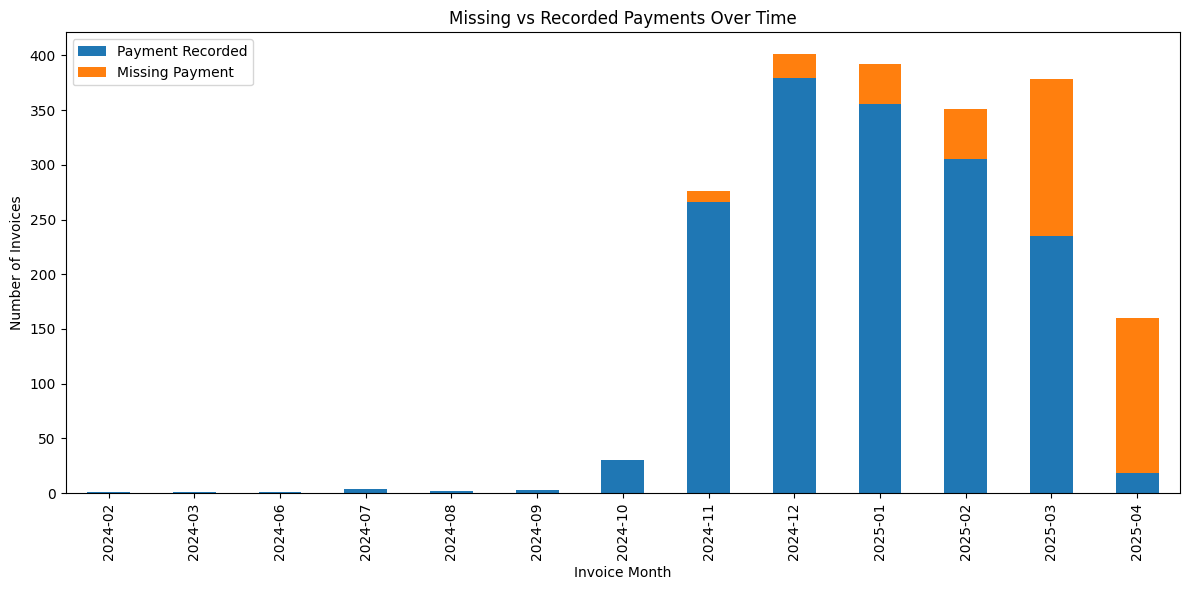

In [ ]:
# Convert to datetime
invoices_df["ReDatum"] = pd.to_datetime(invoices_df["ReDatum"], errors='coerce')
invoices_df["Zahlungsdatum"] = pd.to_datetime(invoices_df["Zahlungsdatum"], errors='coerce')

# Add flag for missing payment
invoices_df["missing_payment"] = invoices_df["Zahlungsdatum"].isna()

# Count missing vs present by invoice month
monthly_issues = invoices_df.groupby(invoices_df["ReDatum"].dt.to_period("M"))["missing_payment"].value_counts().unstack().fillna(0)

monthly_issues.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Missing vs Recorded Payments Over Time")
plt.xlabel("Invoice Month")
plt.ylabel("Number of Invoices")
plt.legend(["Payment Recorded", "Missing Payment"])
plt.tight_layout()
plt.show()

## **Targeted Data Quality Checks for Key Business Columns**

 After standardizing data types for key numeric and datetime fields, we apply a series of data quality checks designed to surface business-critical issues. These checks simulate real-world validation layers implemented in a production pipeline to prevent bad data from propagating into reporting or impacting financial KPIs.

Each issue is collected in a dictionary and printed with row counts and sample records for manual inspection.

Key Checks Performed:

- **Orphaned Positions** – Records in positions with ReId values that don’t exist in invoices.

- **Orphaned Invoices** – Invoices referencing customer IDs (KdNr) that don’t exist in the customers table.

- **Orphaned Positions by Customer** – Positions with unmatched KdNr values.

- **Invalid Revenue** – Positions with zero or negative Nettobetrag, which should not occur in a financial context.

- **Invalid Payments** – Invoices with zero or negative ZahlungsbetragBrutto.

- **Duplicate Invoices** – Duplicate invoice numbers (ReNummer), which may indicate double entries or manual errors.

- **Future-Dated Entries** – Any position or invoice with a date (VerDatum, ReDatum) later than today.

In [ ]:
customers_clean = customers_df.copy()
invoices_clean = invoices_df.copy()
positions_clean = positions_df.copy()

#Data type cleanup
customers_clean["Kdnr"] = pd.to_numeric(customers_clean["Kdnr"], errors='coerce')
invoices_clean["KdNr"] = pd.to_numeric(invoices_clean["KdNr"], errors='coerce')
invoices_clean["ZahlungsbetragBrutto"] = pd.to_numeric(invoices_clean["ZahlungsbetragBrutto"], errors='coerce')
invoices_clean["SummeNetto"] = pd.to_numeric(invoices_clean["SummeNetto"], errors='coerce')
invoices_clean["Summenebenkosten"] = pd.to_numeric(invoices_clean["Summenebenkosten"], errors='coerce')
positions_clean["KdNr"] = pd.to_numeric(positions_clean["KdNr"], errors='coerce')
positions_clean["ReId"] = pd.to_numeric(positions_clean["ReId"], errors='coerce')
positions_clean["Nettobetrag"] = pd.to_numeric(positions_clean["Nettobetrag"], errors='coerce')
positions_clean["Bildnummer"] = pd.to_numeric(positions_clean["Bildnummer"], errors='coerce')
positions_clean["VerDatum"] = pd.to_datetime(positions_clean["VerDatum"], errors='coerce')
invoices_clean["ReDatum"] = pd.to_datetime(invoices_clean["ReDatum"], errors='coerce')
invoices_clean["Zahlungsdatum"] = pd.to_datetime(invoices_clean["Zahlungsdatum"], errors='coerce')

#********************************************************************* DATA QUALITY CHECKS**********************************************************************************

issues = {}

# CHECK 1. Orphaned Positions: ReId not in invoices
issues['orphaned_positions'] = positions_clean[~positions_clean["ReId"].isin(invoices_clean["ReNummer"])]

# CHECK 2. Orphaned Invoices: KdNr not in customers
issues['orphaned_invoices'] = invoices_clean[~invoices_clean["KdNr"].isin(customers_clean["Kdnr"])]

# CHECK 3. Orphaned Positions by Customer
issues['orphaned_positions_customers'] = positions_clean[~positions_clean["KdNr"].isin(customers_clean["Kdnr"])]

# CHECK 4. Nulls in critical fields
issues['positions_with_nulls'] = positions_clean[
    positions_clean[["ReId", "KdNr", "Nettobetrag", "Bildnummer", "VerDatum"]].isnull().any(axis=1)
]
issues['invoices_with_nulls'] = invoices_clean[
    invoices_clean[["ReNummer", "KdNr", "SummeNetto", "ZahlungsbetragBrutto", "ReDatum"]].isnull().any(axis=1)
]

# CHECK 5. Zero or negative Nettobetrag
issues['positions_invalid_revenue'] = positions_clean[positions_clean["Nettobetrag"] <= 0]

# CHECK 6. Zero or negative ZahlungsbetragBrutto
issues['invoices_invalid_payment'] = invoices_clean[invoices_clean["ZahlungsbetragBrutto"] <= 0]

# CHECK 7. Duplicates in invoices
issues['duplicate_invoices'] = invoices_clean[invoices_clean.duplicated(subset=["ReNummer"], keep=False)]

# CHECK 8. Future-dated entries
today = pd.Timestamp(datetime.today().date())
issues['positions_future_dates'] = positions_clean[positions_clean["VerDatum"] > today]
issues['invoices_future_dates'] = invoices_clean[invoices_clean["ReDatum"] > today]

#REPORT
for key, df in issues.items():
    print(f"\n--- {key} ({len(df)} rows) ---")
    display(df.head(10))


--- orphaned_positions (0 rows) ---


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum



--- orphaned_invoices (0 rows) ---


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum



--- orphaned_positions_customers (60680 rows) ---


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
0,4154495,102038,50292.0,19.0,168161043.0,2022-09-29
1,4154496,102038,50292.0,19.0,108514408.0,2022-09-12
2,4154497,102038,50292.0,19.0,55374589.0,2022-09-08
3,4154498,102038,50292.0,19.0,55374589.0,2022-09-08
4,4154499,102038,50292.0,19.0,57865918.0,2022-09-08
5,4154500,102038,50292.0,19.0,57865918.0,2022-09-08
6,4154501,102038,50292.0,19.0,61438596.0,2022-09-29
7,4154502,102038,50292.0,19.0,75889859.0,2022-09-14
8,4154503,102038,50292.0,19.0,75889859.0,2022-09-14
9,4154504,102038,50292.0,19.0,77760198.0,2022-09-29



--- positions_with_nulls (4 rows) ---


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
482,4156318,102055,79640.0,800.0,100000000.0,NaT
84350,4250726,103259,11257.0,75.0,165070078.0,NaT
84413,4250725,103254,20258.0,80.0,169144734.0,NaT
124096,5715403,103381,NaN,NaN,NaN,NaT



--- invoices_with_nulls (1 rows) ---


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum
1270,102331,1297.5,7,NaN,10957,0.0,2025-04-01,NaT



--- positions_invalid_revenue (222 rows) ---


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
1591,4255274,102455,78317.0,-11.53,100000000.0,2022-11-30
2400,4218294,102114,20963.0,-713.46,100000000.0,2022-10-15
5304,4258210,103091,72830.0,-25.00,100000000.0,2022-12-31
6423,4325591,103365,10817.0,-32.40,100000000.0,2022-12-15
6441,4332135,102631,78997.0,-55.00,100000000.0,2022-10-15
7505,4256343,102704,70677.0,-17.12,100000000.0,2022-11-30
7536,4256809,101617,79290.0,-3.60,100000000.0,2022-09-15
7545,4256926,101618,78171.0,-53.83,100000000.0,2022-09-15
8425,4286552,102715,70573.0,-9.32,100000000.0,2022-10-31
8504,4290480,101624,11289.0,-2000.00,100000000.0,2023-01-09



--- invoices_invalid_payment (399 rows) ---


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum
0,103601,11786.7,0,0.0,78911,0.0,2025-04-04,NaT
1,103600,379.0,7,0.0,79666,0.0,2025-04-03,NaT
2,103599,160.0,7,0.0,30145,0.0,2025-04-04,NaT
3,103598,225.0,7,0.0,10383,0.0,2025-04-01,NaT
4,103597,1260.0,7,0.0,20213,0.0,2025-04-03,NaT
5,103596,3378.0,7,0.0,12220,0.0,2025-04-03,NaT
9,103592,120.0,7,0.0,10375,0.0,2025-03-31,NaT
10,103591,300.0,7,0.0,12572,0.0,2025-04-03,NaT
11,103590,2000.0,7,0.0,73287,0.0,2025-04-03,NaT
12,103589,2000.0,7,0.0,12407,0.0,2025-04-03,NaT



--- duplicate_invoices (0 rows) ---


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum



--- positions_future_dates (13 rows) ---


,id,ReId,KdNr,Nettobetrag,Bildnummer,VerDatum
79645,5513009,102165,11390.0,70.00,2.404884e+07,2025-04-30
83378,5653363,102437,10451.0,16.61,1.052667e+09,2025-12-31
83379,5653364,102437,10451.0,16.61,1.052621e+09,2025-12-31
83380,5653365,102437,10451.0,16.61,1.008312e+09,2025-12-31
83381,5653366,102437,10451.0,16.61,1.024264e+09,2025-12-31
83382,5653367,102437,10451.0,16.61,1.024828e+09,2025-12-31
100939,5517668,102233,78552.0,150.00,1.012116e+09,2025-06-01
107819,5686373,103214,20664.0,25.00,1.047599e+09,2025-08-14
107820,5686374,103214,20664.0,25.00,1.048603e+09,2025-08-14
107821,5686375,103214,20664.0,10.00,3.814008e+07,2025-08-16



--- invoices_future_dates (0 rows) ---


,ReNummer,SummeNetto,MwStSatz,ZahlungsbetragBrutto,KdNr,Summenebenkosten,ReDatum,Zahlungsdatum


# **Investigating Unmatched Customer IDs (KdNr) in Positions**
Understanding the structure and origin of unmatched customer IDs in the positions dataset; *KdNr values that do not exist in the customers table.*

- This insight can guide data cleanup or coordination with the Backoffice team if certain customer groups need to be remapped or corrected.

In [ ]:
missing_kdnrs = positions_clean[~positions_clean["KdNr"].isin(customers_clean["Kdnr"])]["KdNr"].unique()
missing_kdnrs_df = pd.DataFrame(missing_kdnrs, columns=["KdNr"])
missing_kdnrs_df["KdNr_str"] = missing_kdnrs_df["KdNr"].astype(str).str.zfill(5)
missing_kdnrs_df["prefix"] = missing_kdnrs_df["KdNr_str"].str[:2]

# Check most common prefixes or ranges
print(missing_kdnrs_df["prefix"].value_counts().head(10))

prefix
10    144
79    126
78     82
12     62
11     62
20     59
73     41
72     33
77     31
50     28
Name: count, dtype: int64
